# Logistic Regression on Startups Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

**Read the data set**

In [2]:
startupsDataSet = pd.read_csv("50_Startups.csv")
startupsDataSet.head(3)

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


**Data Pre-processing**

In [3]:
startupsDataSet.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

**Convert "PROFIT" into a categorical column using mean function of Numpy**

In [4]:
import numpy as np
meanProfit = np.mean(startupsDataSet.PROFIT)
print(meanProfit)

112012.63920000002


In [5]:
meanProfitList = []
for i in startupsDataSet.PROFIT:
    if(i < meanProfit):
        meanProfitList.append(1)
    else:
        meanProfitList.append(0)

In [6]:
startupsDataSet["NEW_PROFIT"] = meanProfitList

In [7]:
startupsDataSet.head(3)

,RND,ADMIN,MKT,STATE,PROFIT,NEW_PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83,0
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0


**Identify the unique elements of the categorical data variable "STATE"**

In [8]:
print(startupsDataSet['STATE'].unique())

['New York' 'California' 'Florida']


**Count the number of unique elements of the categorical data variable "STATE"**

In [9]:
startupsDataSet['STATE'].value_counts()

California    17
New York      17
Florida       16
Name: STATE, dtype: int64

**Label Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
startupsDataSet['LABEL_ENCODED_STATE'] = le.fit_transform(startupsDataSet.STATE)

In [11]:
startupsDataSet.head(4)

,RND,ADMIN,MKT,STATE,PROFIT,NEW_PROFIT,LABEL_ENCODED_STATE
0,165349.20,136897.80,471784.10,New York,192261.83,0,2
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,0,2


**Drop the Species column as it is now Label Encoded**

In [12]:
startupsDataSet.drop("STATE",axis = 1)

startupsDataSet.head(4)

,RND,ADMIN,MKT,STATE,PROFIT,NEW_PROFIT,LABEL_ENCODED_STATE
0,165349.20,136897.80,471784.10,New York,192261.83,0,2
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,0,2


**Exploratory Data Analysis**

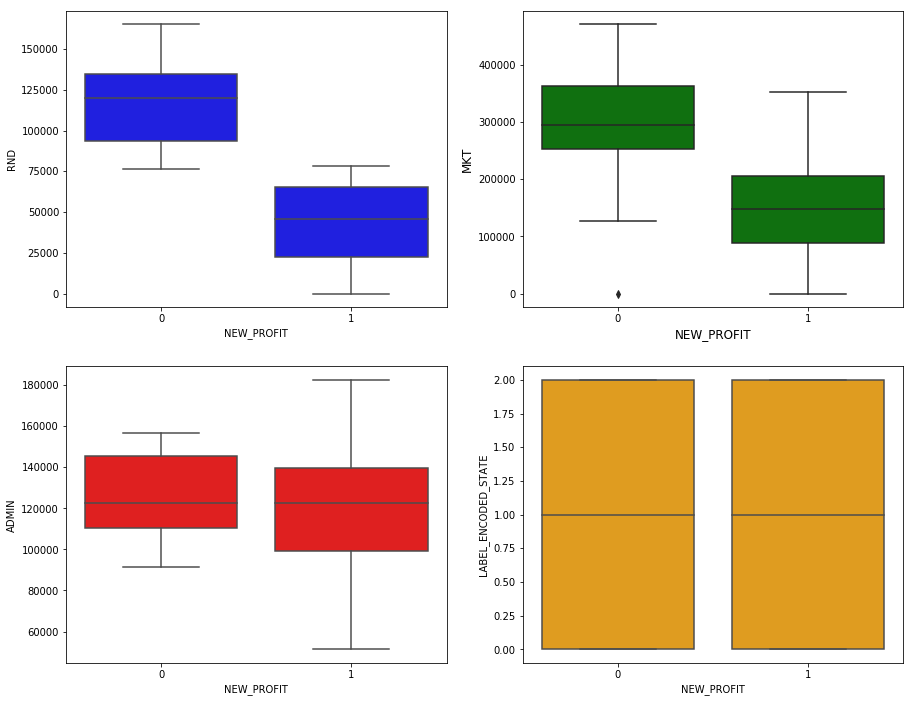

In [13]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sb.boxplot(startupsDataSet["NEW_PROFIT"],startupsDataSet["RND"],color = "blue")
plt.xlabel("NEW_PROFIT")
plt.ylabel("RND")

plt.subplot(2,2,2)
sb.boxplot(startupsDataSet["NEW_PROFIT"],startupsDataSet["MKT"],color = "green")
plt.xlabel("NEW_PROFIT",fontsize = 'large')
plt.ylabel("MKT",fontsize ='large')

plt.subplot(2,2,3)
sb.boxplot(startupsDataSet["NEW_PROFIT"],startupsDataSet["ADMIN"],color = "red")
plt.xlabel("NEW_PROFIT")
plt.ylabel("ADMIN")

plt.subplot(2,2,4)
sb.boxplot(startupsDataSet["NEW_PROFIT"],startupsDataSet["LABEL_ENCODED_STATE"],color = "orange")
plt.xlabel("NEW_PROFIT")
plt.ylabel("LABEL_ENCODED_STATE")

plt.show()

**Observation : RND predictor is more linear compared to other predictors **

# Simple Logistic Regression

**Prepare the data for sampling**

In [14]:
X = startupsDataSet[["RND"]]
Y = startupsDataSet[["NEW_PROFIT"]]

**Split the data into training and testing sets**

In [15]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=40)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


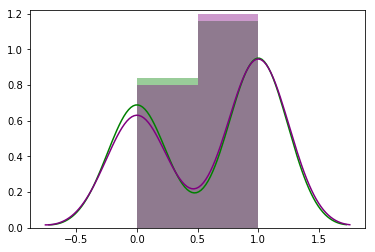

In [16]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

**Train the model using sklearn LogisticRegression**

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modelLogistic = lr.fit(xtrain,ytrain)

/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Build Predictions**

In [18]:
predLogistic=modelLogistic.predict(xtest)

In [19]:
xtest['PREDICTED'] = predLogistic
xtest['ACTUAL'] = ytest

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
xtest.head()

,RND,PREDICTED,ACTUAL
33,55493.95,0,1
29,65605.48,0,1
49,0.00,1,1
38,20229.59,0,1
45,1000.23,0,1


# Multinomial Logistic Regression

**Prepare the data for sampling**

In [21]:
X = startupsDataSet[["RND","MKT"]]
Y = startupsDataSet[["NEW_PROFIT"]]

**Split the data into training and testing sets**

In [22]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=40)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


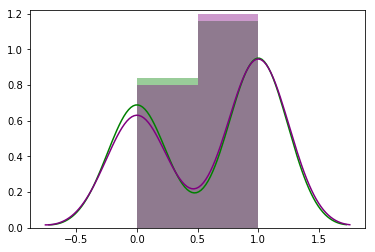

In [23]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

**Train the model using sklearn LogisticRegression**

In [24]:
from sklearn.linear_model import LogisticRegression
mlr = LogisticRegression()
modelMultiNomialLogistic = mlr.fit(xtrain,ytrain)

/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Build Predictions**

In [25]:
predMultiNomialLogistic=modelMultiNomialLogistic.predict(xtest)

In [26]:
xtest['PREDICTED'] = predMultiNomialLogistic
xtest['ACTUAL'] = ytest

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
xtest.head()

,RND,MKT,PREDICTED,ACTUAL
33,55493.95,214634.81,1,1
29,65605.48,107138.38,0,1
49,0.00,45173.06,1,1
38,20229.59,185265.10,1,1
45,1000.23,1903.93,0,1


**Confusion matrix and Accuracy score for Simple Logistic Regression**

The accuracy score for Simple Logistic Regression is 0.60


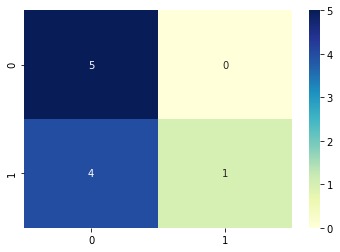

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmLogistic=confusion_matrix(ytest,predLogistic)
sb.heatmap(cmLogistic, annot=True,cmap = "YlGnBu")
print("The accuracy score for Simple Logistic Regression is %.2f"%accuracy_score(ytest,predLogistic))

**Confusion matrix and Accuracy score for Multi-nomial Logistic Regression**

The accuracy score for Multi-nomial Logistic Logistic Regression is 0.80


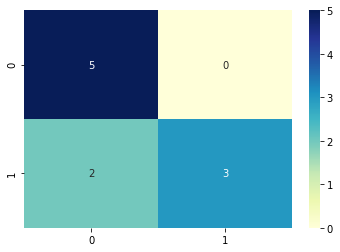

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmMultiNomialLogistic=confusion_matrix(ytest,predMultiNomialLogistic)
sb.heatmap(cmMultiNomialLogistic, annot=True,cmap = "YlGnBu")
print("The accuracy score for Multi-nomial Logistic Logistic Regression is %.2f"%accuracy_score(ytest,predMultiNomialLogistic))

**Observation : The Accuracy score of  Multi-nomial Logistic Regression is better than the Simple Logistic Regression for the same set of samples(random_state = 40).**